In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_yds_rec_salary_18-19')

In [3]:
wrs.dtypes

NAME             object
YDS/REC         float64
YDS/REC_rank    float64
salary            int64
dtype: object

In [4]:
wrs.head()

,NAME,YDS/REC,YDS/REC_rank,salary
0,DeSean Jackson,18.9,3.0,11166667
1,Russell Shepard,18.8,4.0,1250000
2,Mike Evans,17.7,6.0,16500000
3,Dante Pettis,17.3,7.0,1600140
4,Marquise Goodwin,17.2,8.0,6416667


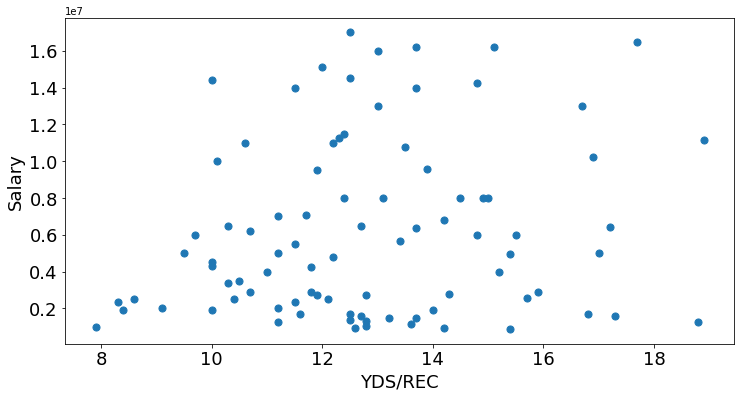

In [5]:
ax = wrs.plot(kind="scatter", x = 'YDS/REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['YDS/REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([-7.45253157e-16, -6.38059210e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.20485833,  1.31158046],
       [-0.08137791, -0.81061351],
       [-1.15255984, -0.45588749],
       [ 1.60084948,  1.56747299],
       [ 1.20259046, -0.31155912]])

In [11]:
km.predict(X)

array([3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 1,
       1, 4, 1, 0, 0, 0, 4, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,YDS/REC,YDS/REC_rank,salary,clusters
0,DeSean Jackson,18.9,3.0,11166667,3
1,Russell Shepard,18.8,4.0,1250000,4
2,Mike Evans,17.7,6.0,16500000,3
3,Dante Pettis,17.3,7.0,1600140,4
4,Marquise Goodwin,17.2,8.0,6416667,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.23315789e+01, 1.23585526e+07],
       [1.26291667e+01, 2.38370046e+06],
       [1.00476190e+01, 4.05100310e+06],
       [1.66833333e+01, 1.35613127e+07],
       [1.57235294e+01, 4.72938318e+06]])

In [14]:
wrs.groupby('clusters')[['YDS/REC', 'salary']].mean()

,YDS/REC,salary
clusters,,
0,12.331579,1.235855e+07
1,12.629167,2.383700e+06
2,10.047619,4.051003e+06
3,16.683333,1.356131e+07
4,15.723529,4.729383e+06


In [15]:
centroids = wrs.groupby('clusters')[['YDS/REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

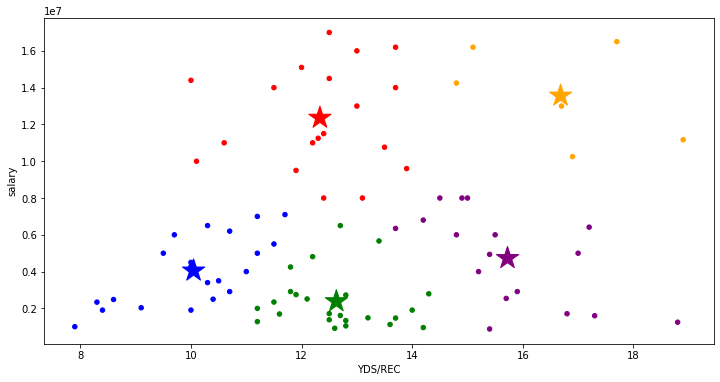

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

35.97390383246862

In [18]:
silhouette_score(X, km.labels_)

0.3874453704301928